In [3]:
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [5]:
data_directory = "data/"
annotation_file_template = "{}/{}/annotation{}.json"

TRAIN_IMAGES_DIRECTORY = "data/train/images"
TRAIN_ANNOTATIONS_PATH = "data/train/annotation.json"
TRAIN_ANNOTATIONS_SMALL_PATH = "data/train/annotation-small.json"

VAL_IMAGES_DIRECTORY = "data/val/images"
VAL_ANNOTATIONS_PATH = "data/val/annotation.json"
VAL_ANNOTATIONS_SMALL_PATH = "data/val/annotation-small.json"

In [6]:
coco = COCO(TRAIN_ANNOTATIONS_SMALL_PATH)
category_ids = coco.loadCats(coco.getCatIds())
print(category_ids)



loading annotations into memory...
Done (t=0.97s)
creating index...
index created!
[{'id': 100, 'name': 'building', 'supercategory': 'building'}]


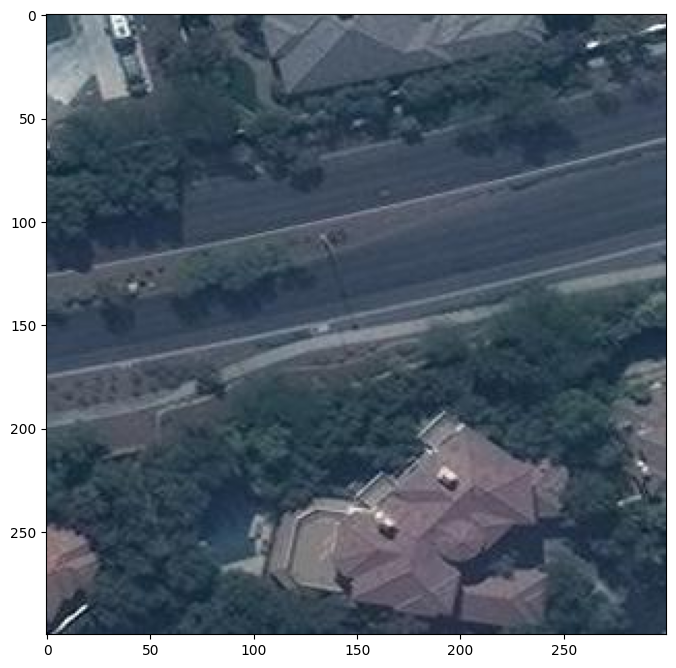

In [7]:
# This generates a list of all `image_ids` available in the dataset
image_ids = coco.getImgIds(catIds=coco.getCatIds())
# For this demonstration, we will randomly choose an image_id
random_image_id = random.choice(image_ids)
# Now that we have an image_id, we can load its corresponding object by doing :
img = coco.loadImgs(random_image_id)[0]
image_path = os.path.join(TRAIN_IMAGES_DIRECTORY, img["file_name"])
I = io.imread(image_path)
plt.imshow(I)

In [8]:
annotation_ids = coco.getAnnIds(imgIds=img['id'])
annotations = coco.loadAnns(annotation_ids)

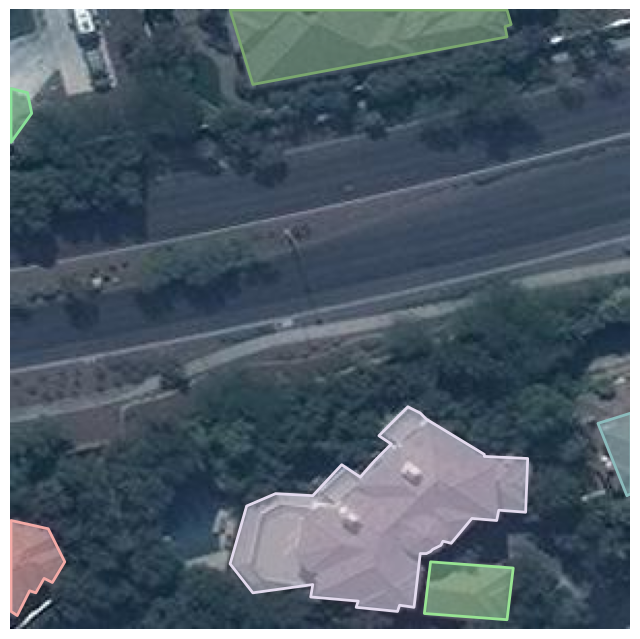

In [9]:
# load and render the image
plt.imshow(I); plt.axis('off')
# Render annotations on top of the image
coco.showAnns(annotations)